# Ejercicio Ridge, Lasso y ElasticNet
Para este ejercicio vas a trabajar con datos de ventas de una empresa que fabrica muebles en España. Esta empresa es una Pyme que demanda conocer de antemano qué ingresos va a tener cada mes, ya que necesita pedir un anticipio a su entidad financiera de cara a poder abastecerse de materia prima al comenzar el mes. Como desconoce cuánto tiene que pedir, tira al alza y acaba pagando muchos intereses. El objetivo es reducir estos gastos.

En las bases de datos de la empresa constan todos los gastos en publicidad y ventas, para cada uno de los meses desde su fundación (hace más de 15 años).

Dado que los presupuestos de marketing se cierran al principio de cada mes, la empresa necesita un modelo predictivo que le anticipe las ventas que conseguirá a final de mes en función de los gastos que realizará en marketing.

Para ello tendrás que utilizar tanto modelos de regresión normales, como regularizados.

1. Carga los datos y realiza un pequeño análisis exploratorio. Mira a ver cómo se relaciona las ventas con el resto de variables.
2. Crea varios modelos y modifica los hiperparámetros necesarios para mejorar el performance del modelo.
3. Interpreta los resultados. Traduce a una fórmula tu mejor modelo (escribir la fórmula simplemente). ¿Cuánto cambian las ventas si aumentamos la inversión en radio un punto más? ¿Y si aumentamos la inversión en TV o periódicos?

## Import libraries 

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis 

In [56]:
df= pd.read_csv("Advertising.csv", sep=(","), index_col=0)
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22100.0
1,44.5,39.3,45.1,10400.0
2,17.2,45.9,69.3,9300.0
3,151.5,41.3,58.5,18500.0
4,180.8,10.8,58.4,12900.0
...,...,...,...,...
195,38.2,3.7,13.8,7600.0
196,94.2,4.9,8.1,9700.0
197,177.0,9.3,6.4,12800.0
198,283.6,42.0,66.2,25500.0


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


Usamos el describe para saber si hay mucha diferencia en la media para normalizar, normalizaremos en este caso, ya que tenemos la media en TV de 147000 mientras que enradio es de 23000

In [58]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14022.500000
std,85.854236,14.846809,21.778621,5217.456566
min,0.700000,0.000000,0.300000,1600.000000
25%,74.375000,9.975000,12.750000,10375.000000
50%,149.750000,22.900000,25.750000,12900.000000
75%,218.825000,36.525000,45.100000,17400.000000
max,296.400000,49.600000,114.000000,27000.000000


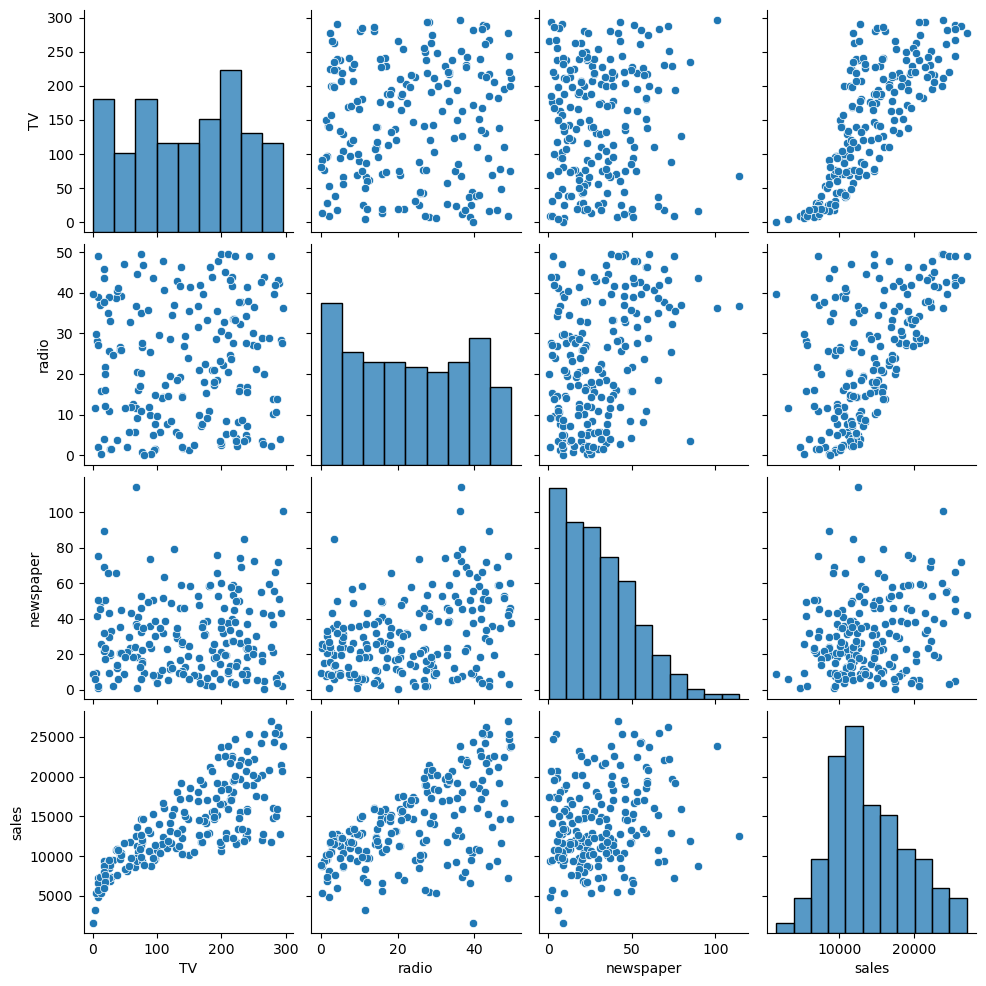

In [59]:
#pairplot
sns.pairplot(df);

<Axes: >

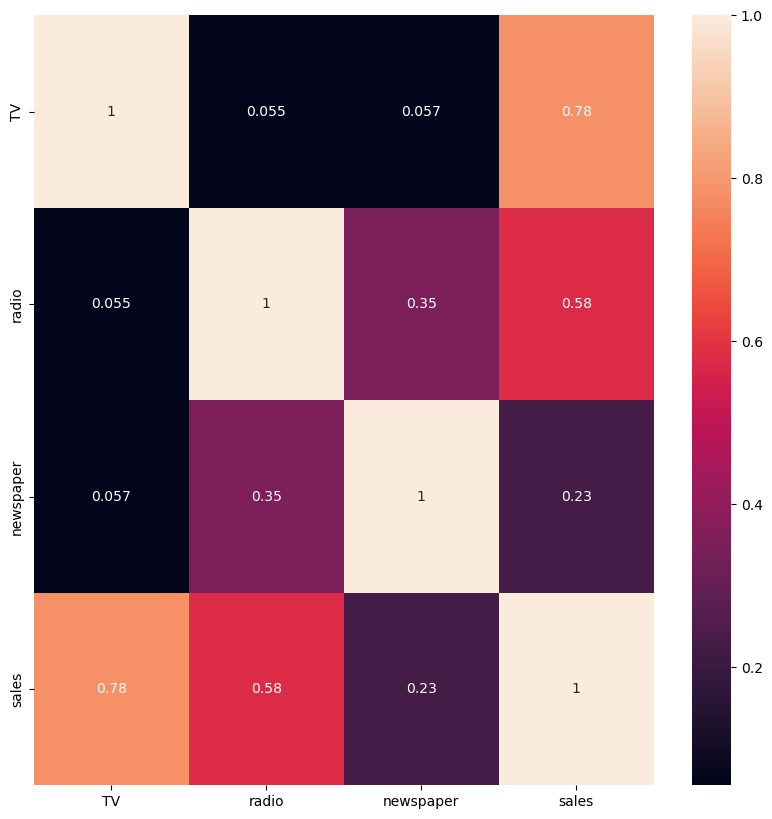

In [60]:
#Hacemos un heatmap
fig = plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

## Modelado

In [61]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [62]:
df.loc[:, ["TV", "radio", "newspaper"]]

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [63]:
# Divide el df en features (X) y target (y)
X = df.loc[:, ["TV", "radio", "newspaper"]]#tv, radio y newspaper
y =df.loc[:, "sales"] #sales

In [64]:
#ENTRENAMOS AL MODELO
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state=0)

In [65]:
#Miramos los shape de cada test y train para ver si lo hemos hecho bien

# Muestra el tamaño de X, X_train, y_train, X_test e y_test
print("Total features shape:", X.shape)
print("Train features shape:", X_train.shape)
print("Train target shape:", y_train.shape)
print("Test features shape:",X_test.shape)
print("Test target shape:", y_test.shape)

Total features shape: (200, 3)
Train features shape: (160, 3)
Train target shape: (160,)
Test features shape: (40, 3)
Test target shape: (40,)


## Regresión Lineal

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [67]:
#instancia y fit del modelo lineal

lr =LinearRegression()

#entrenando el modelo 

lr.fit(X_train, y_train)

predicciones_y = lr.predict(X_test)

# Muestra el score del módelo
from sklearn import metrics

baseline_error = metrics.mean_squared_error(y_test, predicciones_y)


print("MAE test:", metrics.mean_absolute_error(y_test, predicciones_y))
print("MSE test:", metrics.mean_squared_error(y_test, predicciones_y))
print("MAPE test:", metrics.mean_absolute_percentage_error(y_test, predicciones_y))
print("RMSE test:", np.sqrt(metrics.mean_squared_error(y_test, predicciones_y)))

MAE test: 1361.7813502090287
MSE test: 4402118.291449691
MAPE test: 0.24610850610005636
RMSE test: 2098.122563495682


## Regularización

In [68]:
n_alphas = 40
alphas = np.logspace(1, 5, n_alphas) 
alphas

array([1.00000000e+01, 1.26638017e+01, 1.60371874e+01, 2.03091762e+01,
       2.57191381e+01, 3.25702066e+01, 4.12462638e+01, 5.22334507e+01,
       6.61474064e+01, 8.37677640e+01, 1.06081836e+02, 1.34339933e+02,
       1.70125428e+02, 2.15443469e+02, 2.72833338e+02, 3.45510729e+02,
       4.37547938e+02, 5.54102033e+02, 7.01703829e+02, 8.88623816e+02,
       1.12533558e+03, 1.42510267e+03, 1.80472177e+03, 2.28546386e+03,
       2.89426612e+03, 3.66524124e+03, 4.64158883e+03, 5.87801607e+03,
       7.44380301e+03, 9.42668455e+03, 1.19377664e+04, 1.51177507e+04,
       1.91448198e+04, 2.42446202e+04, 3.07029063e+04, 3.88815518e+04,
       4.92388263e+04, 6.23550734e+04, 7.89652287e+04, 1.00000000e+05])

## Ridge L2

In [105]:
from sklearn.linear_model import Ridge

ridgeR = Ridge(alpha = 10)
ridgeR.fit(X_train, y_train)

print("Train MSE sin regularización:", round(metrics.mean_squared_error(y_train, lr.predict(X_train)),2))
print("Test MSE sin regularización:", round(metrics.mean_squared_error(y_test, lr.predict(X_test)),2))

print("Train MSE:", round(metrics.mean_squared_error(y_train, ridgeR.predict(X_train)),2))
print("Test MSE:", round(metrics.mean_squared_error(y_test, ridgeR.predict(X_test)),2))
# print("Test RMSE:", np.sqrt(metrics.mean_squared_error(y_test, ridgeR.predict(X_test))))

Train MSE sin regularización: 2406814.76
Test MSE sin regularización: 4402118.29
Train MSE: 2406815.54
Test MSE: 4401206.98


In [106]:
n_alphas = 100
alphas = np.logspace(1, 5, n_alphas) 

coef_ridge = []
err_ridge = []
baseline = []

errors = {}

for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train, y_train)
    
    coef_ridge.append(ridge.coef_)
    
    predicciones_y = ridge.predict(X_test)
    ridge_error = metrics.mean_squared_error(predicciones_y, y_test)
    
    err_ridge.append(ridge_error)
    baseline.append(baseline_error)
    # como en el ejercicio...

In [107]:
min(err_ridge)

4136381.9232952073

In [108]:
err_ridge.index(min(err_ridge))

71

In [111]:
alphas[71]

7390.7220335257825

In [110]:
# alpha buena
alphas[err_ridge.index(min(err_ridge))]

7390.7220335257825

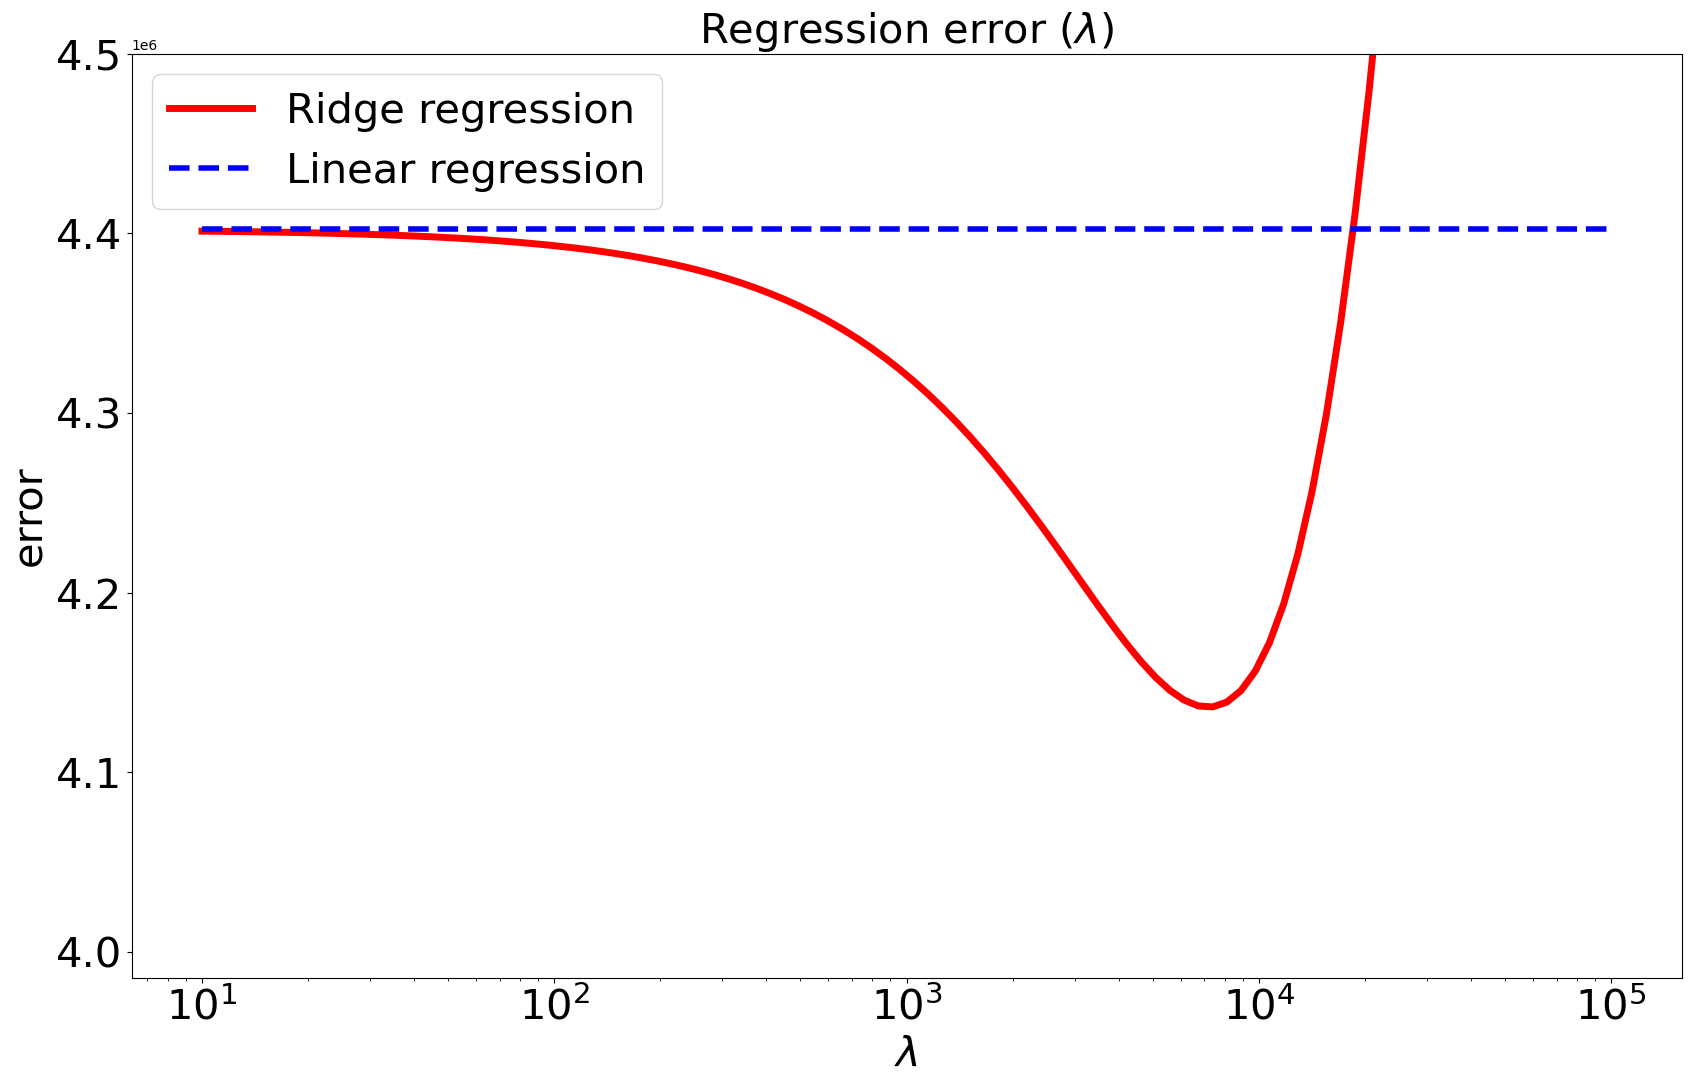

In [112]:
#Soms demasiado buenos y esta grafica os la dejamos.
plt.figure(figsize=(20,12))
ax = plt.gca()
ax.plot(alphas, err_ridge, linewidth=5, color='red', label="Ridge regression")
ax.plot(alphas, baseline, linewidth=4,linestyle='--', color='blue', label='Linear regression')
ax.set_xscale('log')
plt.xlabel('$\lambda$', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylabel('error', fontsize=30)
ax.legend(fontsize=30)
plt.title(r'Regression error ($\lambda$)', fontsize=30)
plt.ylim(None, 4500000)
plt.show()

In [113]:
# Train the model  
ridgeR = Ridge(alpha = 7390.7220335257825) 
ridgeR.fit(X_train, y_train) 

print("Train MSE: %0.4f" % metrics.mean_squared_error(y_train, ridgeR.predict(X_train)))
print("Test MSE: %0.4f" % metrics.mean_squared_error(y_test, ridgeR.predict(X_test)))
print("Test MAE: %0.4f" % metrics.mean_absolute_error(y_test, ridgeR.predict(X_test)))
print("Test RMSE: %0.4f" % np.sqrt(metrics.mean_squared_error(y_test, ridgeR.predict(X_test))))

Train MSE: 2681734.6157
Test MSE: 4136381.9233
Test MAE: 1356.5086
Test RMSE: 2033.8097


In [78]:
lr.coef_

array([ 44.58402012, 196.49703416,  -2.78146398])

## Lasso L1

In [114]:
from sklearn.linear_model import Lasso

lassoR = Lasso(alpha=7000)
lassoR.fit(X_train, y_train)

print("Train MSE sin regularización:", round(metrics.mean_squared_error(y_train, lr.predict(X_train)),2))
print("Test MSE sin regularización:", round(metrics.mean_squared_error(y_test, lr.predict(X_test)),2))

print("Train MSE: %0.4f" % metrics.mean_squared_error(y_train, lassoR.predict(X_train)))
print("Test MSE: %0.4f" % metrics.mean_squared_error(y_test, lassoR.predict(X_test)))

Train MSE sin regularización: 2406814.76
Test MSE sin regularización: 4402118.29
Train MSE: 2640821.5383
Test MSE: 4225920.4820


In [115]:
from sklearn.linear_model import Lasso
n_alphas = 100
alphas = np.logspace(1, 4, n_alphas) 

coef_lasso = []
err_lasso = []
baseline_l = []

for a in alphas:
    lasso = Lasso(alpha=a)

    lasso.fit(X_train, y_train)
    coef_lasso.append(lasso.coef_)
    predicciones_y = lasso.predict(X_test)
    lasso_error = metrics.mean_squared_error(predicciones_y, y_test)
    
    err_lasso.append(lasso_error)
    baseline_l.append(baseline_error)
 

In [116]:
print(lasso_error)

4310080.181919429


In [117]:
min(err_lasso)

4218332.610463981

In [118]:
err_lasso.index(min(err_lasso))

91

In [119]:
alphas[91]

5722.3676593502205

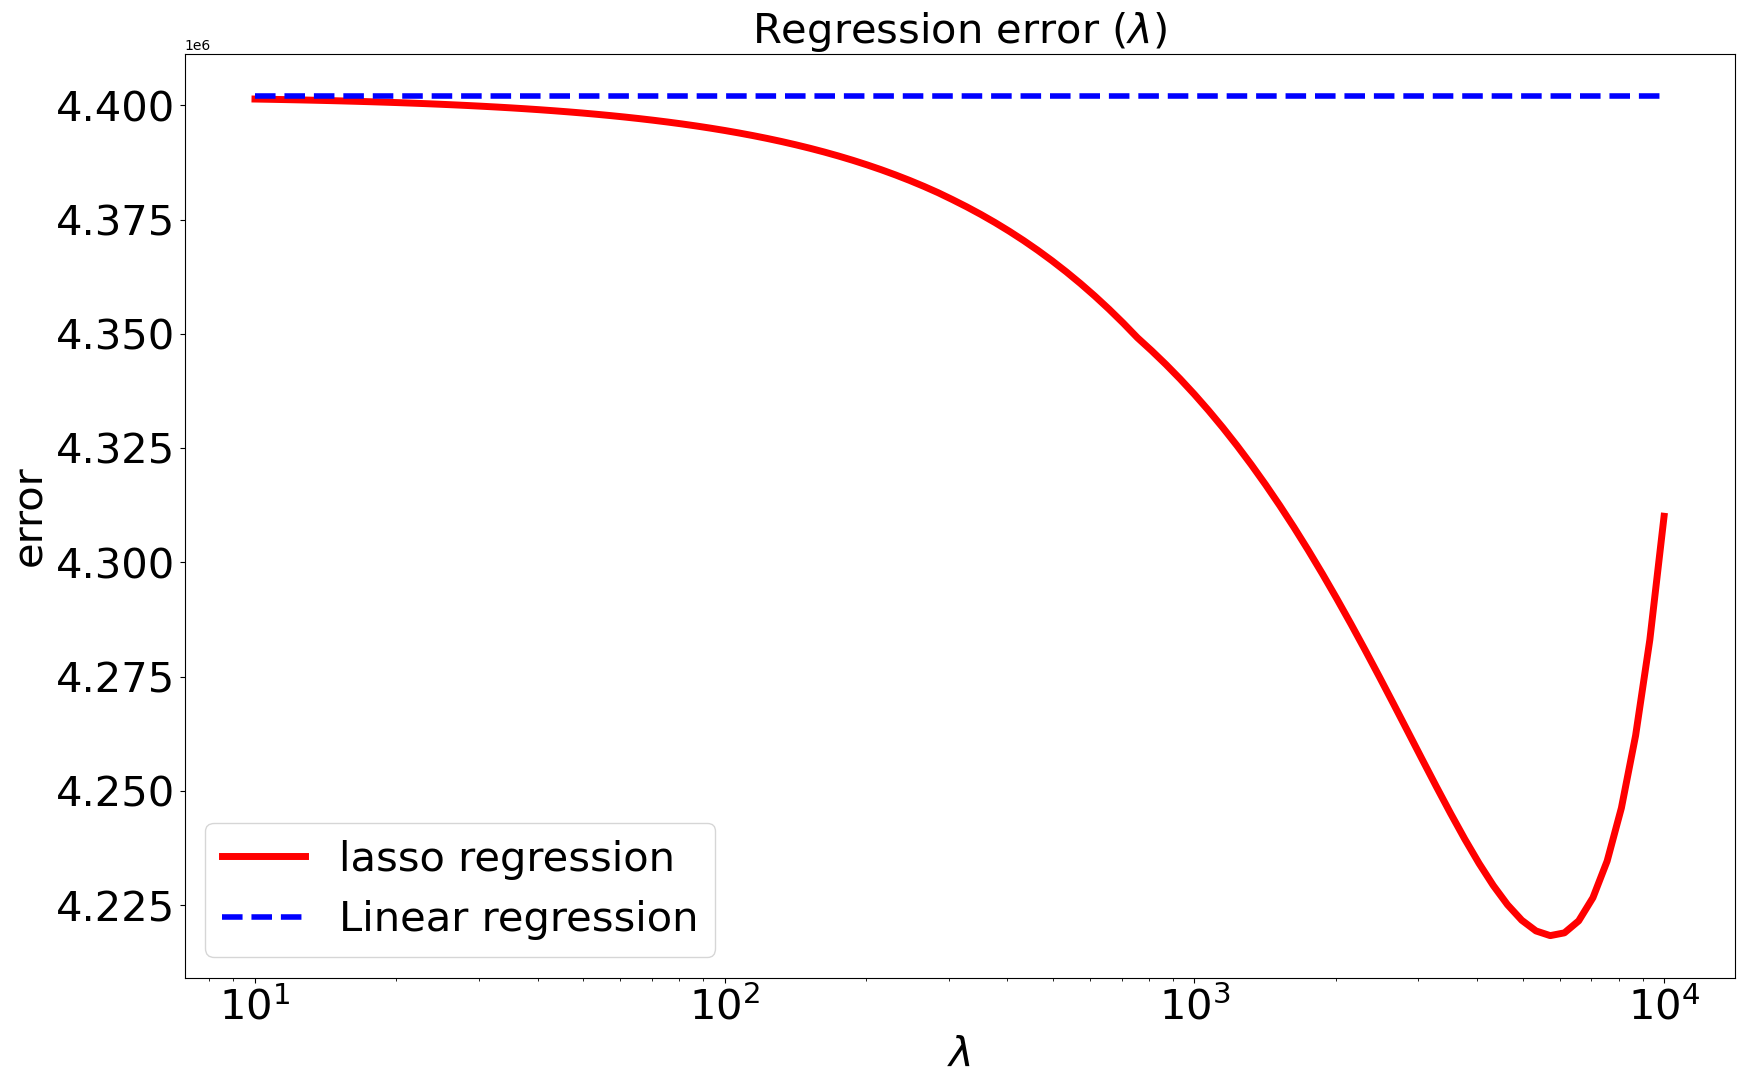

In [120]:
plt.figure(figsize=(20,12))
ax = plt.gca()
ax.plot(alphas, err_lasso, linewidth=5, color='red', label="lasso regression")
ax.plot(alphas, baseline_l, linewidth=4,linestyle='--', color='blue', label='Linear regression')
ax.set_xscale('log')
plt.xlabel('$\lambda$', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylabel('error', fontsize=30)
ax.legend(fontsize=30)
plt.title(r'Regression error ($\lambda$)', fontsize=30)
plt.show()

In [123]:
lassoR = Lasso(alpha = 5722.3676593502205) 
lassoR.fit(X_train, y_train) 

print("Train MSE: %0.4f" % metrics.mean_squared_error(y_train, lassoR.predict(X_train)))
print("Test MSE: %0.4f" % metrics.mean_squared_error(y_test, lassoR.predict(X_test)))

print("Test MAE: %0.4f" % metrics.mean_absolute_error(y_test, lassoR.predict(X_test)))
print("Test RMSE: %0.4f" % np.sqrt(metrics.mean_squared_error(y_test, lassoR.predict(X_test))))

Train MSE: 2564235.4600
Test MSE: 4218332.6105
Test MAE: 1340.9992
Test RMSE: 2053.8580


In [92]:
import warnings
warnings.filterwarnings("ignore")

## Elastic net

In [124]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet 

elastic_net = ElasticNet(alpha = 10, l1_ratio=0.5)
elastic_net.fit(X_train, y_train)

print("Train MSE: %0.4f" % metrics.mean_squared_error(y_train, elastic_net.predict(X_train)))
print("Test MSE: %0.4f" % metrics.mean_squared_error(y_test, elastic_net.predict(X_test)))


Train MSE: 2411637.5720
Test MSE: 4335456.8364


## Falta corregir esta parte --> mirar profe

In [137]:

coef_eln = []
err_eln = []
baseline = []
alphas_eln = []
r_eln = []
minimo = 1000000000000000000000

for a in alphas:
    for r in np.arange(0, 1.1, 0.1):
            elastic_net = ElasticNet(alpha = a, l1_ratio=r)
            elastic_net.fit(X_train, y_train)
            
            coef_eln.append(elastic_net.coef_)
            
            y_pred = elastic_net.predict(X_test)
            elasticnet_error = metrics.mean_squared_error(predicciones_y, y_test)
            
            err_eln.append(elasticnet_error)
            baseline.append(baseline_error)
            
            alphas_eln.append(a)
            r_eln.append(r)
            
            if elasticnet_error < minimo:
                minimo = elasticnet_error

In [142]:
#Y este es GridSearch, no es con bucle busqueda manual, es con una funcion:
elastic = ElasticNet()

parameters = {'alpha': np.logspace(0,2,20),
              'l1_ratio': np.arange(0,1,0.1)}

elastic_gs = GridSearchCV(elastic, parameters, cv=3, scoring='neg_mean_squared_error', verbose=1)

elastic_gs.fit(X_train, y_train)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


GridSearchCV(cv=3, estimator=ElasticNet(),
             param_grid={'alpha': array([  1.        ,   1.27427499,   1.62377674,   2.06913808,
         2.6366509 ,   3.35981829,   4.2813324 ,   5.45559478,
         6.95192796,   8.8586679 ,  11.28837892,  14.38449888,
        18.32980711,  23.35721469,  29.76351442,  37.92690191,
        48.32930239,  61.58482111,  78.47599704, 100.        ]),
                         'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
             scoring='neg_mean_squared_error', verbose=1)

In [143]:
min(err_eln)

4310080.181919429

In [144]:
err_eln.index(min(err_eln))

0

In [145]:
alphas[0]

10.0

ValueError: x and y must have same first dimension, but have shapes (100,) and (1100,)

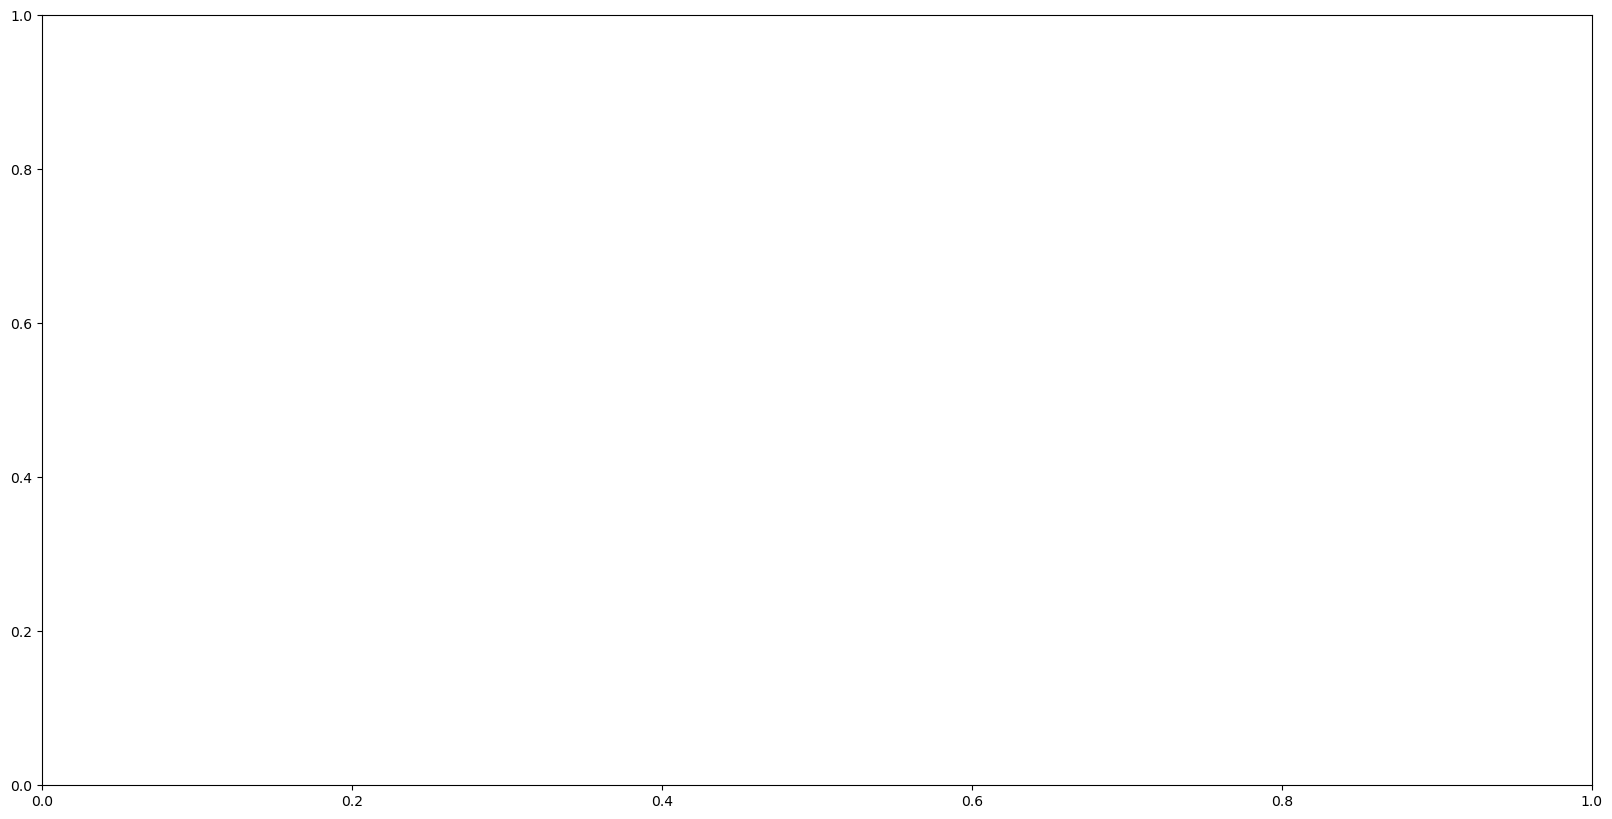

In [146]:
plt.figure(figsize=(20,10))
ax = plt.gca()
ax.plot(alphas, err_eln, linewidth=5, color='red', label="Elastic net")
ax.plot(alphas, baseline, linewidth=4,linestyle='--', color='blue', label='Linear regression')
ax.set_xscale('log')
plt.xlabel('$\lambda$', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylabel('error', fontsize=30)
ax.legend(fontsize=30)
plt.title(r'Regression error ($r=1$)', fontsize=30)
plt.show()

In [97]:
elastic_net = ElasticNet(alpha = 0.02, l1_ratio=1)
elastic_net.fit(X_train, y_train) 

print("Train MSE: %0.4f" % metrics.mean_squared_error(y_train, elastic_net.predict(X_train)))
print("Test MSE: %0.4f" % metrics.mean_squared_error(y_test, elastic_net.predict(X_test)))

Train MSE: 2406814.7558
Test MSE: 4402116.7690


In [98]:
print("Linear regression error:   %0.4f" % baseline_error)    
print("Minimun ridge error:       %0.4f" % min(err_ridge))
print("Minimum lasso error:       %0.4f" % min(err_lasso))
print("Minimum elastic net error: %0.4f" % min(err_eln))

Linear regression error:   4402118.2914
Minimun ridge error:       4136464.8608
Minimum lasso error:       4218332.6105
Minimum elastic net error: 4310080.1819


In [99]:
elastic_net.score(X_test, y_test)

0.8601145668802275

In [100]:
# buscad alpha y r con el doble bucle

In [101]:


print('MAE test',)
print('MSE test',)
print('RMSE test', )

MAE test
MSE test
RMSE test


In [102]:

# ridge = Ridge()

# parameters = {'alpha': np.logspace(0,5,100)
#             }

# ridge_gs = GridSearchCV(ridge, parameters, cv=3, scoring='neg_mean_squared_error', verbose =200)

# ridge_gs.fit(X_train, y_train)


In [103]:


# ridge = Ridge(alpha=1)
# ridge.fit(X_train, y_train)

# print('MAE test', mean_absolute_error(y_test, ridge.predict(X_test)))
# print('MSE test', mean_squared_error(y_test, ridge.predict(X_test)))
# print('RMSE test', np.sqrt(mean_squared_error(y_test, ridge.predict(X_test))))

## Resultados

Nos quedmaos con el modelo de Lasso del principio, con un alpha=6000 porque es el modelo que mejor generaliza, o lo que es lo mismo, el modelo que tiene errores más bajos en sus predicciones ante los datos de test.

In [104]:
y

0      22100.0
1      10400.0
2       9300.0
3      18500.0
4      12900.0
        ...   
195     7600.0
196     9700.0
197    12800.0
198    25500.0
199    13400.0
Name: sales, Length: 200, dtype: float64

# BONUS TRACK:

REPETIR RESULTADOS USANDO POLY FEATURES
